In [19]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

τ_i = 2.5   # 平均到着間隔
τ_s = 2.0  # 平均サービス時間

λ = 1/τ_i   # 平均到着率
μ = 1/τ_s   # 平均サービス率
ρ = λ/μ    # 混雑度

# print('理論的平均システム内人数',round(ρ/(1-ρ),2))
print('理論的平均待ち時間',round(ρ/(μ-λ),2))
# print('\n')

def simulation(m):
  t = 0
  t_interval = 0    # 到着間隔
  t_service = 0     # サービス時間
  t_arrival = 0     # 到着時刻
  t_start = 0       # サービス開始時刻
  t_end = 0         # サービス終了時刻
  t_wait = 0        # 待ち時間

  T_arrival = []    # 到着時刻のリスト
  T_start = []      # 開始時刻のリスト
  T_end = []        # 終了時刻のリスト
  T_arrival = []    # 到着時刻のリスト
  T_wait = []       # 待ち時間のリスト

  n_system = 0      # システム内人数
  n_queue = 0       # 待ち人数

  N_system = []     # システム内人数リスト
  N_queue = []      # 待ち人数のリスト

  # print(" 客 到着時刻 開始時刻 Ｓ時間 終了時刻 待ち時間")

  i = 0
  while i < m:
      t_interval = -τ_i*math.log(1-random.random())
      t_service = -τ_s*math.log(1-random.random())

      t_arrival = t_arrival + t_interval
      T_arrival.append(t_arrival)

      if t_end > t_arrival:
        t_start = t_end
        T_start.append(t_start)

      else:
        t_start = t_arrival
        T_start.append(t_start)

      t_end = t_start + t_service
      T_end.append(t_end)
      t_wait = t_start - t_arrival
      T_wait.append(t_wait)

      # print("{:3}{:8}{:8}{:6}{:8}{:8}".format(
      #   i+1,
      #   round(t_arrival,2),
      #   round(t_start,2),
      #   round(t_service,2),
      #   round(t_end,2),
      #   round(t_wait,2)))
      i += 1

  # 平均待ち時間
  num = len(T_wait)     # リストの長さ（要素数）を取得
  total = sum(T_wait)   # リストの要素の合計を取得
  avg = round(total / num,3)

  return avg

# print('\n')
# print("平均待ち時間(シミュレーション結果)", avg , "分")



理論的平均待ち時間 8.0


平均待ち時間(シミュレーション結果) 7.817 分
標準偏差 2.639 分


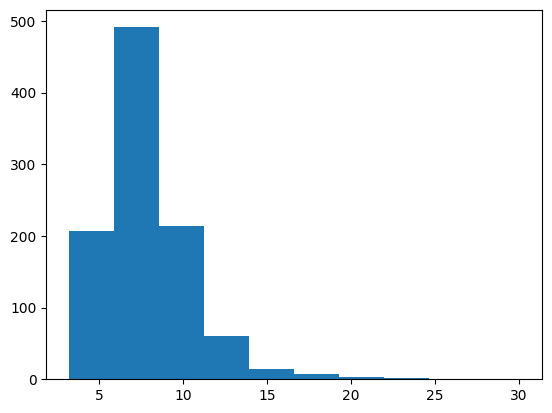

In [21]:
data = [simulation(1000) for k in range(1000)]
plt.hist(data)
print("平均待ち時間(シミュレーション結果)", round(np.mean(data),3) , "分")
print("標準偏差", round(np.std(data),3) , "分")